In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_3940\1701648897.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_3940\1701648897.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


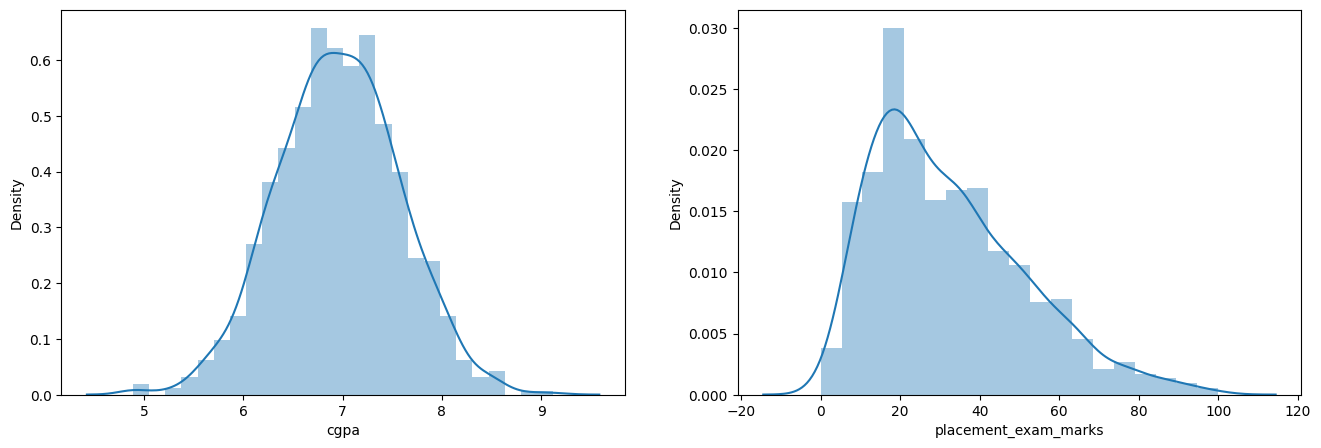

In [4]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(df['cgpa'])

plt.subplot(122)
sns.distplot(df['placement_exam_marks'])
plt.show()

In [5]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

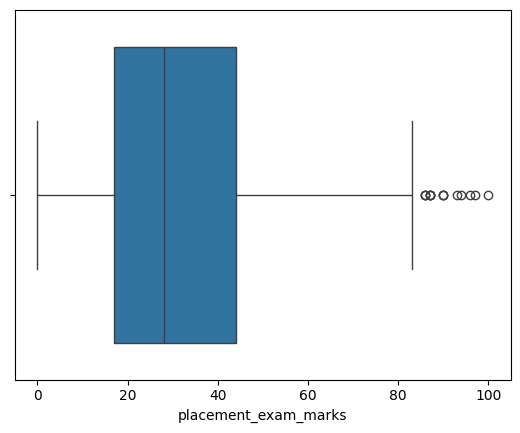

In [7]:
sns.boxplot(df['placement_exam_marks'], orient='h')

# Finding the IQR

In [8]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [11]:
IQR = percentile75 - percentile25

In [12]:
IQR

27.0

In [13]:
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

In [17]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [18]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


# Trimming

In [19]:
new_df = df[df['placement_exam_marks'] < upper_limit]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_3940\200397557.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_3940\200397557.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


<Axes: ylabel='placement_exam_marks'>

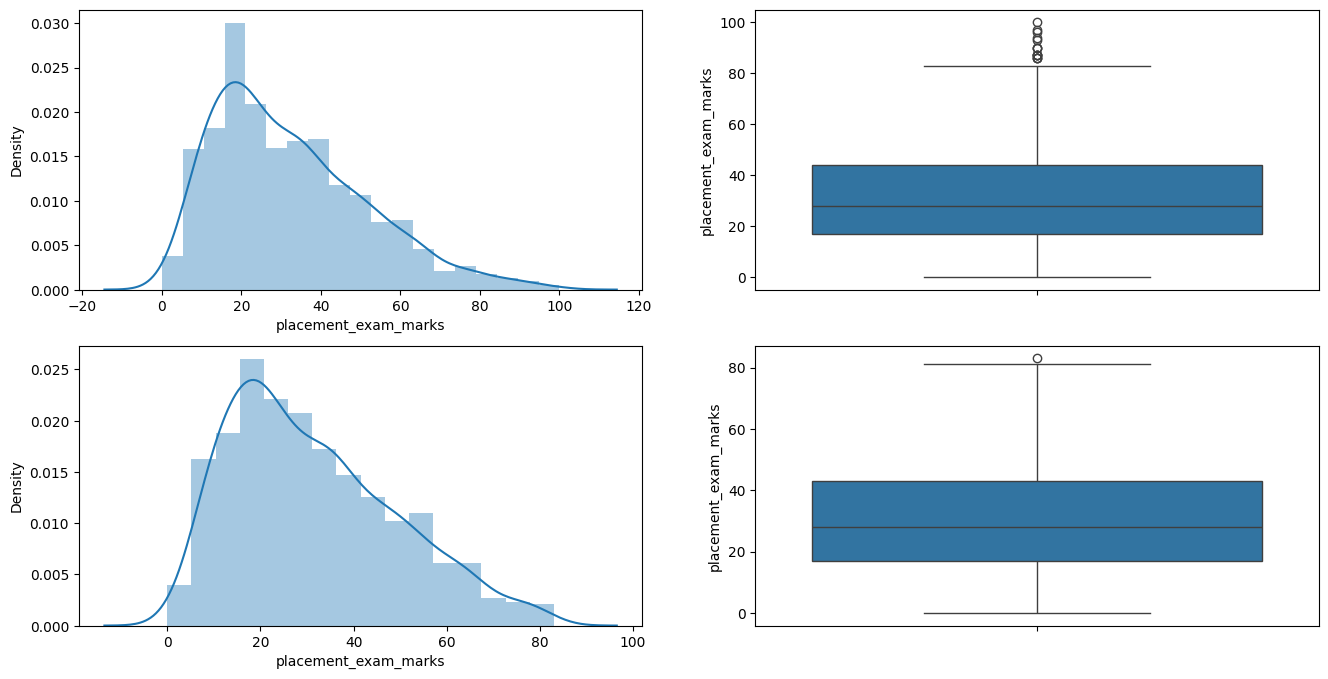

In [22]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

# Capping

In [23]:
df['placement_exam_marks'] = np.where(
    df['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        df['placement_exam_marks'] < lower_limit,
        lower_limit,
        df['placement_exam_marks']
    )
)

In [25]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.136500
std        18.865419
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max        84.500000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

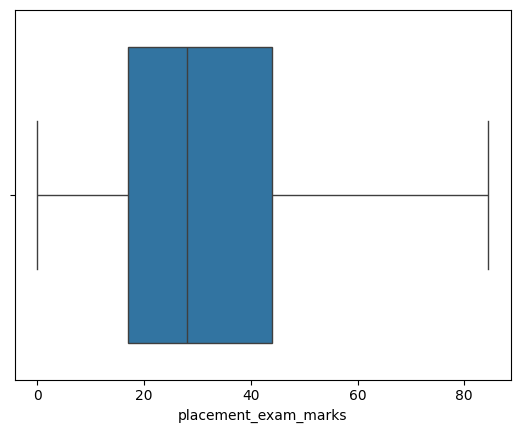

In [27]:
sns.boxplot(df['placement_exam_marks'], orient='h')

# With Different Dataset

In [33]:
df = pd.read_csv('titanic_toy.csv')

In [34]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [35]:
df.describe()

,Age,Fare,Family,Survived
count,714.000000,846.000000,891.000000,891.000000
mean,29.699118,32.279338,0.904602,0.383838
std,14.526497,50.305796,1.613459,0.486592
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.895800,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.206250,1.000000,1.000000
max,80.000000,512.329200,10.000000,1.000000


C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_3940\2748116447.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_3940\2748116447.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


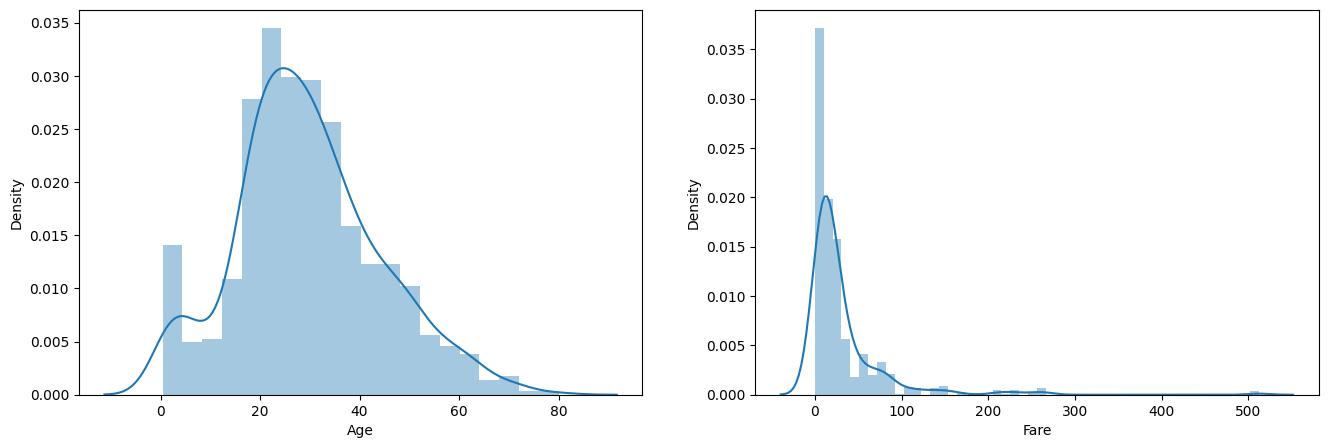

In [36]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(df['Age'])

plt.subplot(122)
sns.distplot(df['Fare'])
plt.show()

<Axes: ylabel='Fare'>

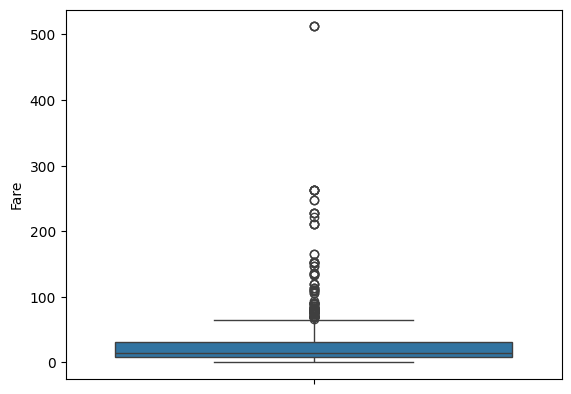

In [38]:
sns.boxplot(df['Fare'])

In [39]:
percentile25 = df['Fare'].quantile(0.25)
percentile75 = df['Fare'].quantile(0.75)

In [40]:
IQR = percentile75 - percentile25

In [41]:
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

In [43]:
lower_limit

-27.06987499999999

In [44]:
df[df['Fare'] > upper_limit]

,Age,Fare,Family,Survived
1,38.0,71.2833,1,1
27,19.0,263.0000,5,0
31,NaN,146.5208,1,1
34,28.0,82.1708,1,0
52,49.0,76.7292,1,1
...,...,...,...,...
846,NaN,69.5500,10,0
849,NaN,89.1042,1,1
856,45.0,164.8667,2,1
863,NaN,69.5500,10,0


In [45]:
df[df['Fare'] < lower_limit]

,Age,Fare,Family,Survived


# Trimming

In [47]:
new_df = df[df['Fare'] < upper_limit]

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_3940\2615305288.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_3940\2615305288.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Fare'])


<Axes: ylabel='Fare'>

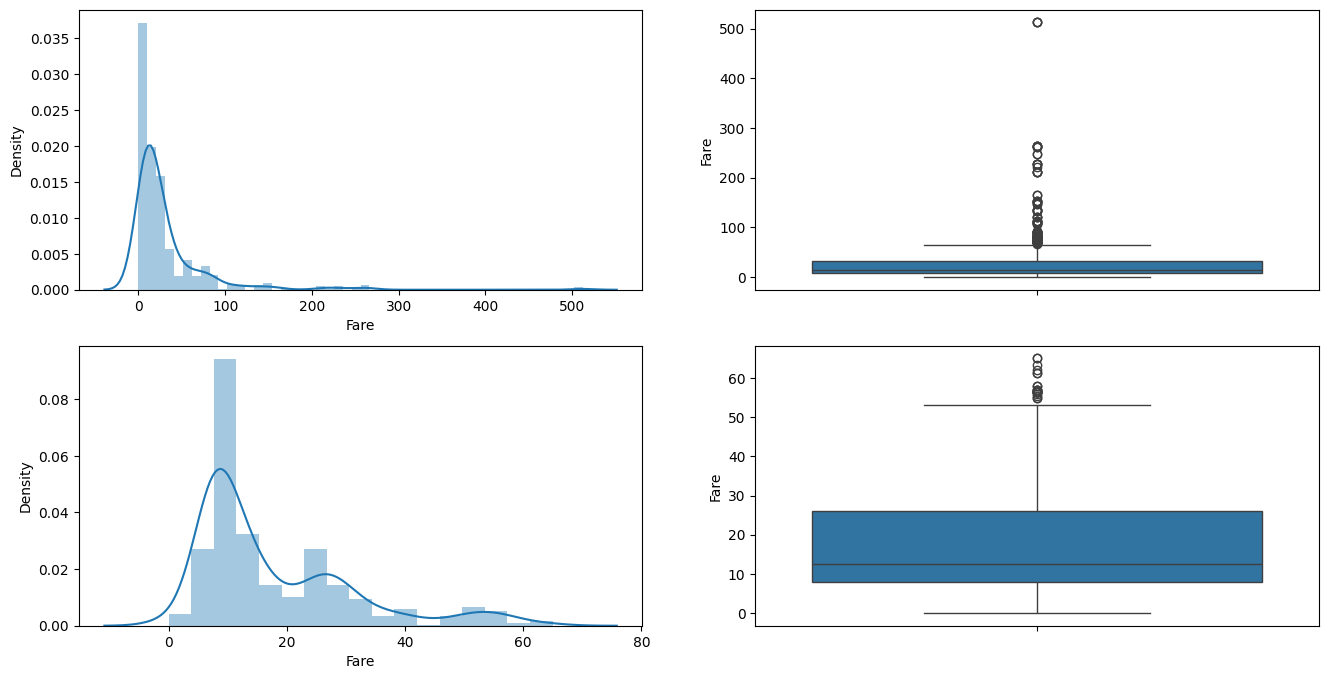

In [48]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Fare'])

plt.subplot(2,2,2)
sns.boxplot(df['Fare'])

plt.subplot(2,2,3)
sns.distplot(new_df['Fare'])

plt.subplot(2,2,4)
sns.boxplot(new_df['Fare'])

# Capping

In [49]:
df['Fare'] = np.where(
    df['Fare'] > upper_limit,
    upper_limit,
    np.where(
        df['Fare'] < lower_limit,
        lower_limit,
        df['Fare']
    )
)

<Axes: xlabel='Fare'>

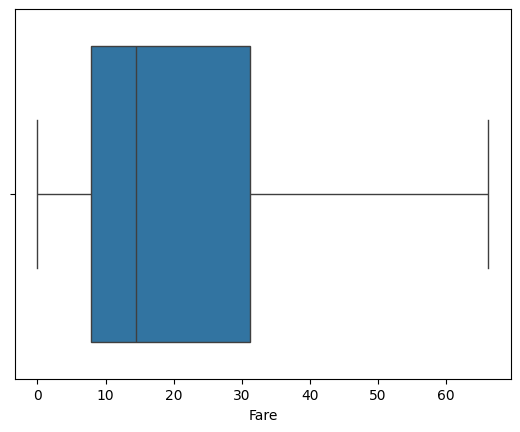

In [51]:
sns.boxplot(df['Fare'], orient='h')

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_3940\3425841524.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

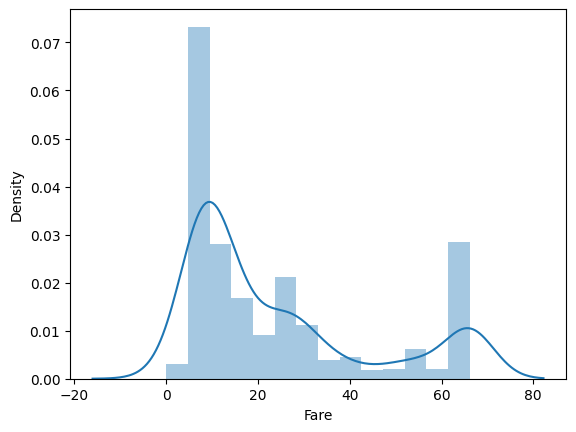

In [52]:
sns.distplot(df['Fare'])